# Analytic Datasets Visualization Ideas
#### *Last updated: Feb 11th 2023* 
#### by Eli Wang

In [1]:
from analyticsdf.analyticsdataframe import AnalyticsDataframe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil

### Function to generate the dataset in example 1

In [2]:
## Function to generate the dataset in example 1
def generate_eg1(seed=None):
    ad = AnalyticsDataframe(1000, 6)
    for var in ['X1', 'X2', 'X3', 'X4', 'X5']:
        ad.update_predictor_uniform(var, 0, 100)
    ad.update_predictor_categorical('X6', ["Red", "Yellow", "Blue"], [0.3, 0.4, 0.3])

    predictor_name_list = ['X1', 'X2', 'X4']
    polynomial_order = [1, 2, 1]
    beta = [0, 15, -30, 2, 5]
    int_matrix = np.array([
        [0,0,0,0], 
        [0,0,0,0], 
        [0,0,0,0], 
        [0,0,0,0]])
    eps_var = 2000

    ad.generate_response_vector_polynomial(
                predictor_name_list = predictor_name_list, 
                polynomial_order = polynomial_order, 
                beta = beta,
                interaction_term_betas = int_matrix, 
                epsilon_variance = eps_var)
    ad.update_response_poly_categorical(
        predictor_name='X6',
        betas={'Red': -2000, 'Blue': 1000}
    )
    return ad

### Function to generate the dataset in example 2

In [84]:
## Function to generate the dataset in example 2
def generate_eg2(seed=None):
    ad = AnalyticsDataframe(1000, 6)
    covariance_matrix = np.array([[10, 9, 4],
                                [9, 10, 6],
                                [4, 6, 20]])
    ad.update_predictor_normal(predictor_name_list=["X1", "X2", "X3"],
                                mean=[100, 80, 120],
                                covariance_matrix=covariance_matrix)
    ad.update_predictor_uniform('X5', 0, 100)
    ad.update_predictor_categorical('X6', ["Red", "Yellow", "Blue"], [0.3, 0.4, 0.3])

    ad.update_predictor_multicollinear(target_predictor_name = 'X4', dependent_predictors_list = ['X1', 'X2', 'X3'], beta=[0, 1, 1.5, 0], epsilon_variance=20)

    # create a new predictor column, change categorical value into numerical value
    categorical_mapping = {'Red': 5, 'Yellow': 1, 'Blue': 1}
    ad.predictor_matrix["X6_weight"] = ad.predictor_matrix.replace({'X6': categorical_mapping}, inplace=False)['X6']
    predictor_name_list = ['X1', 'X3', 'X6_weight']
    polynomial_order = [1, 1, 1]
    beta = [100, 0, 1.5, 0]
    int_matrix = np.array([
        [0,0,0], 
        [0,0,0], 
        [1,0,0]])
    eps_var = 10

    ad.generate_response_vector_polynomial(
                predictor_name_list = predictor_name_list, 
                polynomial_order = polynomial_order, 
                beta = beta,
                interaction_term_betas = int_matrix, 
                epsilon_variance = eps_var)
    ad.response_vector = np.exp(0.001 * ad.response_vector)
    return ad

In [85]:
studentID = 48923
df_eg1 = generate_eg1(seed=studentID)
df_eg2 = generate_eg2(seed=studentID)

In [86]:
df_eg1.predictor_matrix.head()

,X1,X2,X3,X4,X5,X6
0,28.755395,85.215851,96.770926,79.762087,74.792782,Red
1,10.017282,83.781579,21.563068,44.430964,12.141770,Blue
2,25.953058,75.453015,3.150752,44.987272,27.672160,Blue
3,86.335964,32.631118,70.664176,49.073975,83.044349,Yellow
4,14.200862,13.810005,23.191838,0.551773,6.856893,Red


In [87]:
df_eg1.response_vector.head()

0    10066.8
1    12928.4
2     9048.5
3    4015.68
4   -2858.59
dtype: object

<AxesSubplot:>

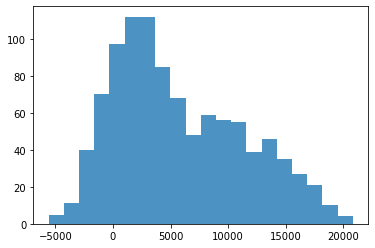

In [88]:
res = df_eg1.response_vector.to_frame()
hist_1d(res)

0


<AxesSubplot:>

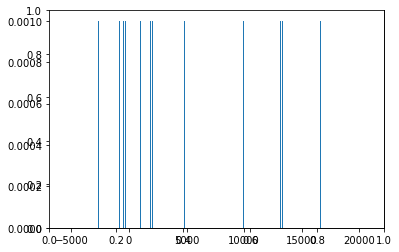

In [89]:
fig, ax = plt.subplots()
plot_univariate(res, 0, fig = fig, position = 111)

In [90]:
df_eg2.predictor_matrix.head()

,X1,X2,X3,X4,X5,X6,X6_weight
0,97.621189,79.085112,116.450134,234.392426,83.576266,Yellow,1
1,101.636999,81.923563,122.971427,256.987770,66.100052,Red,5
2,102.590729,82.121438,125.908224,232.785331,34.819379,Yellow,1
3,102.915002,85.114250,120.279377,264.502414,79.027817,Red,5
4,104.574968,84.083080,130.635205,212.571275,90.650472,Blue,1


In [8]:
df_eg2.response_vector.head()

0    1.483935
1    1.490790
2    1.467672
3    1.457424
4    1.463659
dtype: float64

In [94]:
## For the plot
df_eg2.predictor_matrix = df_eg2.predictor_matrix.drop(['X6_weight'], axis = 1)

KeyError: "['X6_weight'] not found in axis"

### Univariate Histogram for measures

In [9]:
def hist_1d(predictor, fig=None, position=None, bins=20, title=None, label=None):
    """Plot 1 dimensional data in a histogram."""
    fig = fig or plt.figure()      # set which figure
    position = position or 111     # set the 3-digit position (e.g. 234 means 2x3 grid, 4th subplot)
    ax = fig.add_subplot(position) # add the subplot to this position
    
#     ax.hist(predictor, density=True, bins=bins, alpha=0.8, label=label)
    ax.hist(predictor, bins=bins, alpha=0.8, label=label)

    if label:
        ax.legend()

    if title:
        ax.set_title(title)
        ax.title.set_position([.5, 1.05])

    return ax

pandas.core.series.Series

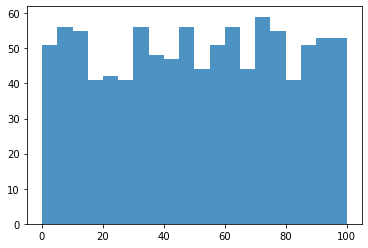

In [10]:
hist_1d(df_eg1.predictor_matrix['X2'])
type(df_eg1.predictor_matrix['X2'])

### Univariate Bar chart for categories

In [11]:
def bar_chart(predictor, fig=None, position=None, title=None, label=None):
    """Plot categorical data in a bar chart."""
    fig = fig or plt.figure()      # set which figure
    position = position or 111     # set the 3-digit position (e.g. 234 means 2x3 grid, 4th subplot)
    ax = fig.add_subplot(position) # add the subplot to this position
    
    categories = sorted(list(predictor.unique()))     # sort both to make sure the names and percentage match
    percentage = list(predictor.value_counts(normalize = True).sort_index())
    
    ax.bar(categories, percentage)
    
    if label:
        ax.legend()
    
    if title:
        ax.set_title(title)
        ax.title.set_position([.5, 1.05])
        
    return ax

<AxesSubplot:title={'center':'Bar Chart for predictor X6'}>

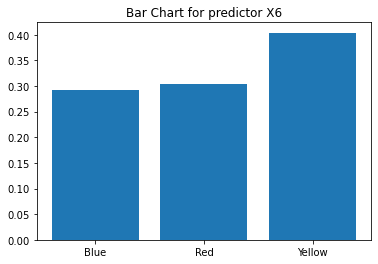

In [12]:
predictor = 'X6'
bar_chart(df_eg1.predictor_matrix[predictor], title = "Bar Chart for predictor {}".format(predictor))

### Bivariate Scatterplot for measure/measure

In [32]:
def scatter_2d(data, columns=None, fig=None, position=None, title=None):
    """Plot 2 dimensional data in a scatter plot."""
    fig = fig or plt.figure()      # set which figure
    position = position or 111     # set the 3-digit position (e.g. 234 means 2x3 grid, 4th subplot)
    ax = fig.add_subplot(position) # add the subplot to this position
    
    columns = columns or data.columns
    if len(columns) != 2:
        raise ValueError('Only 2 columns can be plotted')

    x, y = columns

    ax.scatter(data[x], data[y])
    plt.xlabel(x)
#     plt.ylabel(y)

    if title:
        ax.set_title(title)
        ax.title.set_position([.5, 1.05])

    return ax

<AxesSubplot:xlabel='X1'>

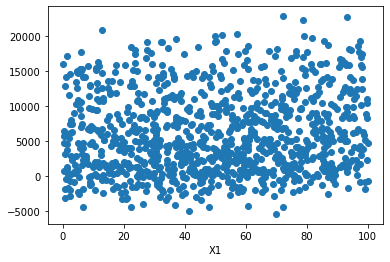

In [33]:
x1 = df_eg1.predictor_matrix['X1']
response = df_eg1.response_vector.rename('response')   ## difference between name and rename?
df_oneres = x1.to_frame().join(response)
scatter_2d(df_oneres)

### Bivariate Side-by-side boxplot for measure/category

In [24]:
def boxplot(measure, category, fig=None, title=None, position=None, label=None):
    """
    Plot a single axis boxplot for a measure,category pair
    measure: pandas.Series
    category: pandas.Seris
    """
    fig = fig or plt.figure()      # set which figure
    position = position or 111     # set the 3-digit position (e.g. 234 means 2x3 grid, 4th subplot)
    ax = fig.add_subplot(position) # add the subplot to this position
    
    df = measure.to_frame(name = 'measure').join(category)
    df.boxplot(column = 'measure', by = category.name, ax = ax)
    fig.suptitle('')  # remove the default title 'Boxplot grouped by ...'
    
    if label:
        ax.legend()
    
    if title:
        ax.set_title(title)
        ax.title.set_position([.5, 1.05])
    
    return ax

<AxesSubplot:title={'center':'measure'}, xlabel='X6'>

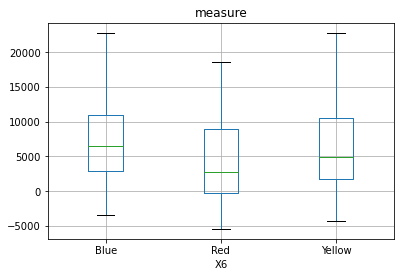

In [25]:
measure = df_eg1.response_vector
category = df_eg1.predictor_matrix['X6']
boxplot(measure, category)

### All-in-one visualization function

In [17]:
pm = df_eg1.predictor_matrix
for i in pm.columns:
    print(pm.dtypes[i])
pm.iloc[:, 0].dtype == 'float64'
type(pm.iloc[:, 0])

float64
float64
float64
float64
float64
object


pandas.core.series.Series

In [18]:
def plot_univariate(df, index, fig, position):
    """
    Check the data type of a column and plot the corresponding univariate chart.
    df: a pandas dataframe
    index: the index of the column to be checked, e.g. 0, 1, 2, ...
    """
    col = df.iloc[:, index]
    col_name = df.columns[index]
    print(col_name)
    ## If the predictor is measure
    if col.dtype == 'float64' or col.dtype == 'int64':
        return hist_1d(col, fig = fig, position = position, title = col_name)   # use the assigned figure instead of creating a new one
    ## If the predictor is category
    elif col.dtype == 'object':
        return bar_chart(col, fig = fig, position = position, title = col_name)

In [19]:
def plot_bivariate(df, response, index, fig, position):
    """
    Check the data type of a column and plot the corresponding bivariate chart.
    df: a pandas dataframe
    index: the index of the column to be checked, e.g. 0, 1, 2, ...
    """
    col = df.iloc[:, index]
    col_name = df.columns[index]
    response = response.rename('response')
    print(col_name)
    ## If the predictor is measure
    if col.dtype == 'float64' or col.dtype == 'int64':
        df = col.to_frame().join(response)
        return scatter_2d(data = df, fig = fig, position = position, title = "{} against Y".format(col_name))   # use the assigned figure instead of creating a new one
    ## If the predictor is category
    elif col.dtype == 'object':
        return boxplot(response, col, fig = fig, position = position, title = "{} against Y".format(col_name))

In [20]:
def df_visualization_uni(df):
    """
    A visulization function that generates:
    Univariate plots for predictors individually (one page), and
    Univariate plot for response vector, and each predictor against the response (one page).
    """
    pred_matrix = df.predictor_matrix
    response = df.response_vector
    n_predictors = len(pred_matrix.columns)
    
    ### ---------- Univariate plots ---------- ###
    # [ADD CODE HERE] Add a if/else condition on n_predictors = 1 or 2
    ncols = 3
    nrows = ceil(n_predictors / ncols)
    
    fig_uni, axs_uni = plt.subplots(nrows, ncols, figsize = (14,10))
    plt.setp(axs_uni, xticks = [], yticks = [])   # a one-liner to remove the default ticks
    
    
    for i in range(nrows):
        for j in range(ncols):
            plt.sca(axs_uni[i,j])    # set the current axes instance to row i, column j
            if i == 0:
                n_th = j + 1
            elif i == 1:
                n_th = j + 4
            position = int(str(nrows) + str(ncols) + str(n_th))  # three-digit integer as position
            index = n_th - 1   # because n_th the # of plot, starts with 1; however, index should start at 0
            plot_univariate(pred_matrix, index, fig_uni, position)
            print("axs: ", i, ",", j, "fig: ", fig_uni)

X1
axs:  0 , 0 fig:  Figure(1008x720)
X2
axs:  0 , 1 fig:  Figure(1008x720)
X3
axs:  0 , 2 fig:  Figure(1008x720)
X4
axs:  1 , 0 fig:  Figure(1008x720)
X5
axs:  1 , 1 fig:  Figure(1008x720)
X6
axs:  1 , 2 fig:  Figure(1008x720)


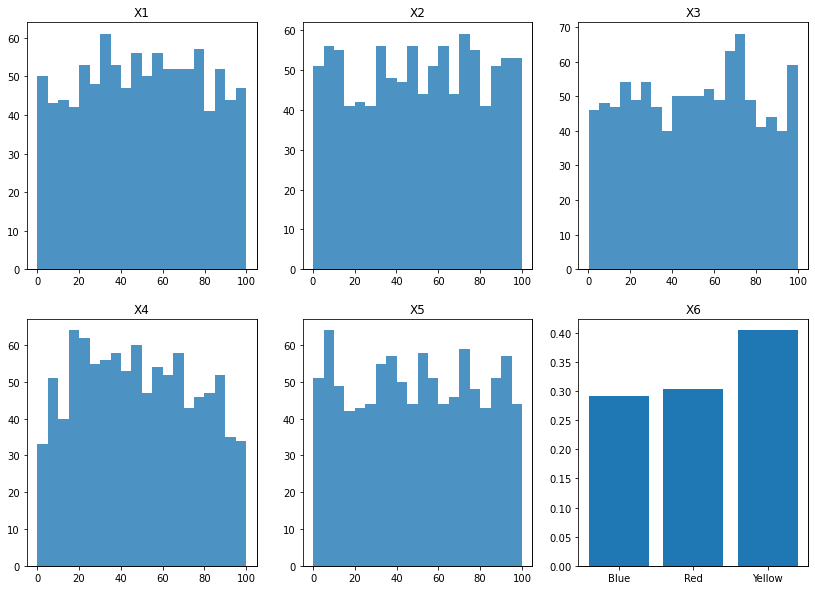

In [21]:
df_visualization_uni(df_eg1)

In [73]:
def df_visualization_bi(df):
    """
    """
    pred_matrix = df.predictor_matrix
    response = df.response_vector
    n_predictors = len(pred_matrix.columns)
    
            
    ### ---------- Response + Bivariate plots ---------- ###
    ncols = 3
    n_plots = n_predictors + 1
    nrows = ceil(n_plots / ncols)  # response plot + each predictor against response
#     nrows = ceil((n_predictors) / ncols)  # response plot + each predictor against response
    fig_bi, axs_bi = plt.subplots(nrows, ncols, figsize = (16,12))
    fig_bi.tight_layout(h_pad = 7)  # w_pad doesn't work
#     plt.subplots_adjust(wspace = 5)             # furthur adjust the horizontal padding
    plt.setp(axs_bi, xticks = [], yticks = [])   # a one-liner to remove the default ticks
            
    
    ### ---------- Plot the graphs ---------- ###
    for i in range(nrows):
        for j in range(ncols):      # 0, 1, ..., (ncols - 1)
            plt.sca(axs_bi[i,j])    # set the current axes instance to row i, column j
            if i == 0:
                n_th = j + 1
                position = int(str(nrows) + str(ncols) + str(n_th))  # three-digit integer as position
                index = n_th - 1   # because n_th the # of plot, starts with 1; however, index should start at 0
                plot_bivariate(pred_matrix, response, index, fig_bi, position)
            elif i == 1:
                n_th = j + 4
                position = int(str(nrows) + str(ncols) + str(n_th))  # three-digit integer as position
                index = n_th - 1   # because n_th the # of plot, starts with 1; however, index should start at 0
                plot_bivariate(pred_matrix, response, index, fig_bi, position)

            elif i == 2 and j == 0:
                n_th = j + 7
                position = int(str(nrows) + str(ncols) + str(n_th))  # three-digit integer as position
                hist_1d(response, fig = fig_bi, position = position, title = 'Y')  # why plot_univariate() comes out weird?
            
            
            print("axs: ", i, ",", j, "fig: ", fig_bi)
            
    ## Delete those empty plots
    for ax in axs_bi.flat:
        ## Check if something was plotted
        if not bool(ax.has_data()):
            fig_bi.delaxes(ax)       ## delete if nothing is plotted in the axes object
    

X1
axs:  0 , 0 fig:  Figure(1152x864)
X2
axs:  0 , 1 fig:  Figure(1152x864)
X3
axs:  0 , 2 fig:  Figure(1152x864)
X4
axs:  1 , 0 fig:  Figure(1152x864)
X5
axs:  1 , 1 fig:  Figure(1152x864)
X6
axs:  1 , 2 fig:  Figure(1152x864)
axs:  2 , 0 fig:  Figure(1152x864)
axs:  2 , 1 fig:  Figure(1152x864)
axs:  2 , 2 fig:  Figure(1152x864)


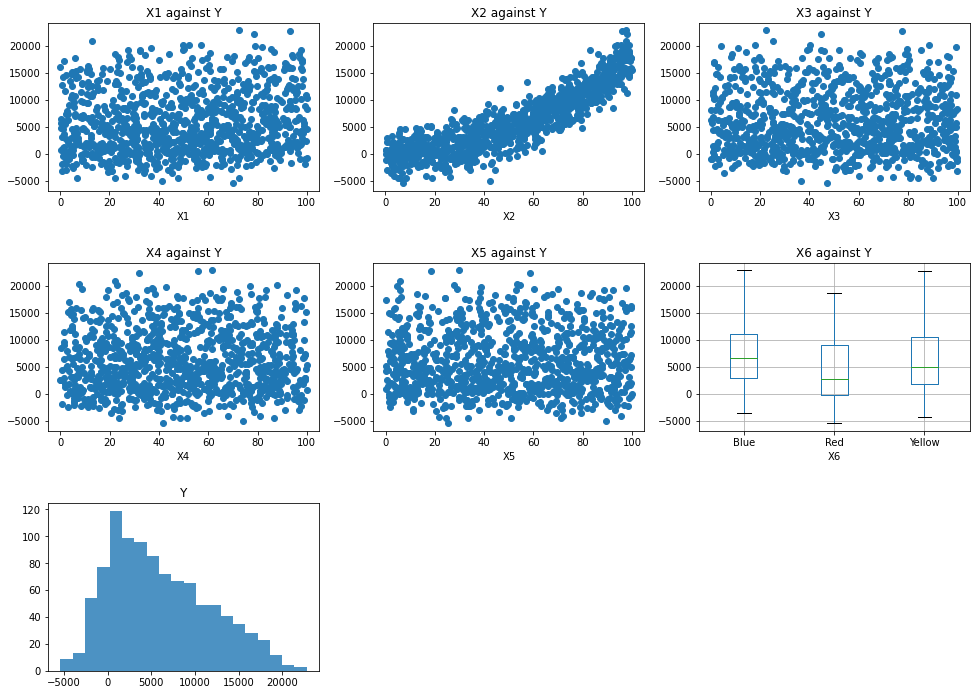

In [74]:
df_visualization_bi(df_eg1)

X1
axs:  0 , 0 fig:  Figure(1008x720)
X2
axs:  0 , 1 fig:  Figure(1008x720)
X3
axs:  0 , 2 fig:  Figure(1008x720)
X4
axs:  1 , 0 fig:  Figure(1008x720)
X5
axs:  1 , 1 fig:  Figure(1008x720)
X6
axs:  1 , 2 fig:  Figure(1008x720)


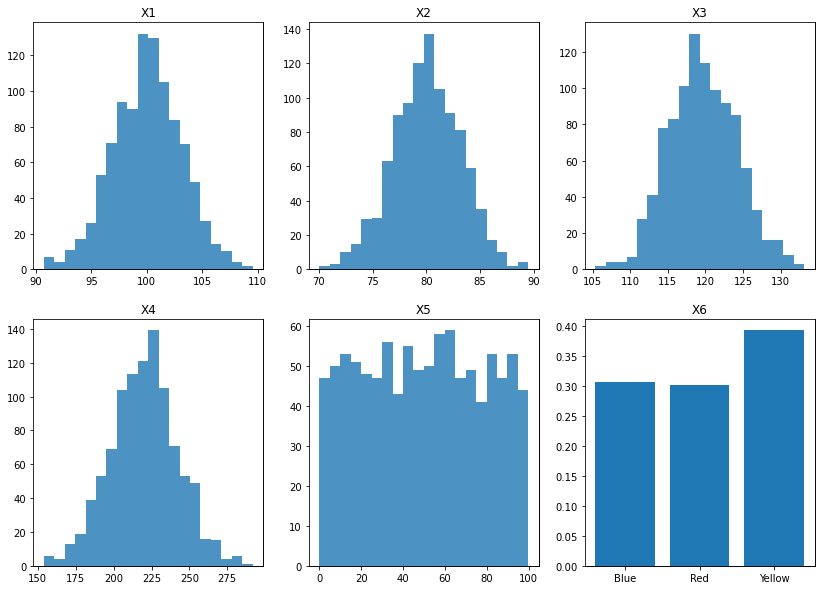

In [95]:
df_visualization_uni(df_eg2)

X1
axs:  0 , 0 fig:  Figure(1152x864)
X2
axs:  0 , 1 fig:  Figure(1152x864)
X3
axs:  0 , 2 fig:  Figure(1152x864)
X4
axs:  1 , 0 fig:  Figure(1152x864)
X5
axs:  1 , 1 fig:  Figure(1152x864)
X6
axs:  1 , 2 fig:  Figure(1152x864)
axs:  2 , 0 fig:  Figure(1152x864)
axs:  2 , 1 fig:  Figure(1152x864)
axs:  2 , 2 fig:  Figure(1152x864)


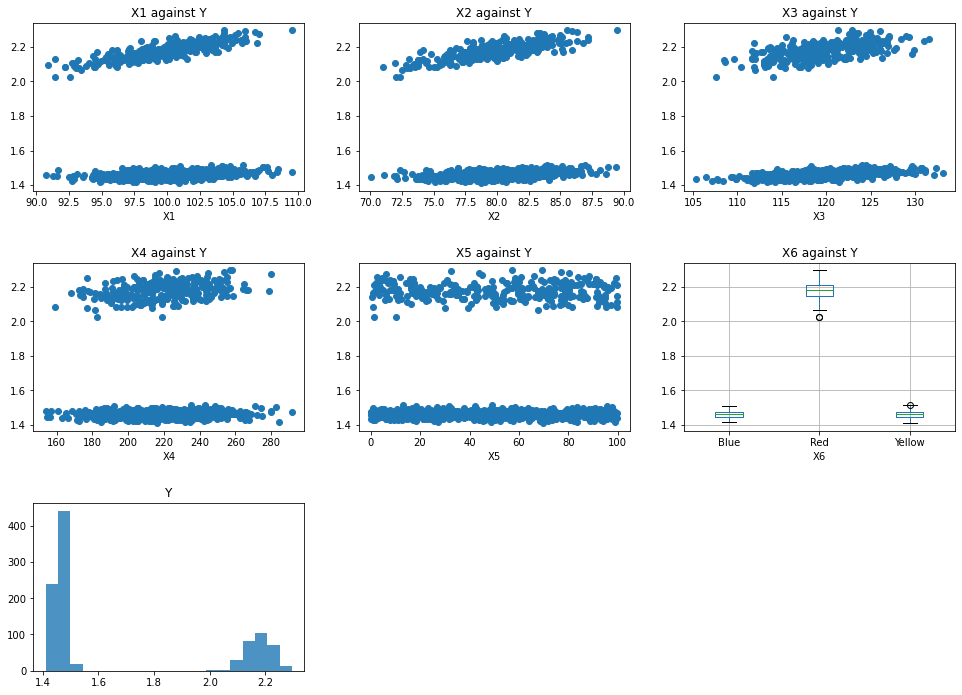

In [96]:
df_visualization_bi(df_eg2)